In [1]:
from keras.datasets import imdb
import numpy as np

In [2]:
data=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
(train_data,train_labels),(test_data,test_labels)=data

In [4]:
def vectorize(sequences,dimension=10000):
  mat=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    #print(i,sequence)
    mat[i,sequence]=1
  return mat


In [ ]:
#test code
#using categorical function, works only with lists but not for matrix. Can either run a loop with each row or use the vectorize funtion as it is

from keras.utils import to_categorical
one_hot=to_categorical(train_data[0])
one_hot_test=vectorize(train_data[0])

In [5]:
train_ohh=vectorize(train_data)
test_ohh=vectorize(test_data)
train_labels_ohh=np.asarray(train_labels).astype('float32')
test_labels_ohh=np.asarray(test_labels).astype('float32')

In [6]:
x_train=train_ohh[:10000]
x_val=train_ohh[10000:]
x_train_label=train_labels_ohh[:10000]
x_val_label=train_labels_ohh[10000:]

In [7]:
from keras.models import Sequential
model=Sequential()

In [8]:
from keras import layers

In [9]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [10]:
from keras import optimizers

In [11]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(x_val,x_val_label,batch_size=512,epochs=20,validation_data=(x_train,x_train_label))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5892 - accuracy: 0.7054 - val_loss: 0.3884 - val_accuracy: 0.8681
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3241 - accuracy: 0.9015 - val_loss: 0.3126 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2331 - accuracy: 0.9224 - val_loss: 0.3105 - val_accuracy: 0.8730
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1801 - accuracy: 0.9412 - val_loss: 0.3148 - val_accuracy: 0.8732
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1411 - accuracy: 0.9560 - val_loss: 0.3261 - val_accuracy: 0.8726
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1157 - accuracy: 0.9652 - val_loss: 0.2912 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0920 - accuracy: 0.9747 - val_loss: 0.3513 - val_accuracy: 0.8716
Epoch 8/20
30

In [13]:
history_dict=history.history

In [14]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
from matplotlib import pyplot as plt

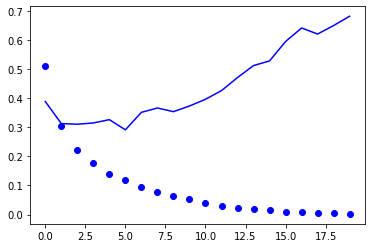

In [16]:
epchs=range(0,20)
plt.plot(epchs,history_dict['loss'],'bo')
plt.plot(epchs,history_dict['val_loss'],'b')
plt.show()

In [17]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

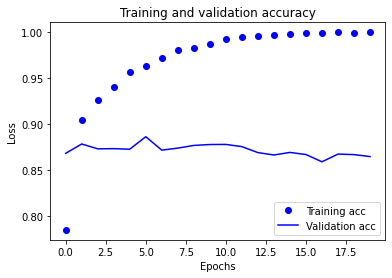

In [18]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epchs,history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epchs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
test_ohh

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [20]:
pred1=model.predict(test_ohh)

In [21]:
test_labels_ohh

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [25]:
pred_classified=[]

In [26]:
for i in pred1:
  if(i>0.5):
    pred_classified.append(1)
  else:
    pred_classified.append(0)

In [27]:
pred_final=np.asarray(pred_classified)

In [28]:
from sklearn.metrics import classification_report

In [29]:
classification_report(test_labels_ohh,pred_final)

'              precision    recall  f1-score   support\n\n         0.0       0.84      0.87      0.85     12500\n         1.0       0.86      0.83      0.85     12500\n\n    accuracy                           0.85     25000\n   macro avg       0.85      0.85      0.85     25000\nweighted avg       0.85      0.85      0.85     25000\n'

the next approach was to use the internal validaiton split tool. Although the training happened right and the resultant graph was accurate, later realised, cannot compare previous data since it uses the first 10 k values for validation and this would use the last fraction for validation

In [ ]:
#model trying to the validation split inherently 
model2=Sequential()
model2.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model2.add(layers.Dense(16,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])



In [ ]:
history_2=model2.fit(train_ohh, train_labels_ohh,batch_size=512,epochs=20,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5964 - accuracy: 0.7239 - val_loss: 0.4058 - val_accuracy: 0.8529
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3405 - accuracy: 0.8953 - val_loss: 0.3330 - val_accuracy: 0.8703
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2419 - accuracy: 0.9211 - val_loss: 0.2789 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1856 - accuracy: 0.9413 - val_loss: 0.2815 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1482 - accuracy: 0.9544 - val_loss: 0.2816 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1188 - accuracy: 0.9649 - val_loss: 0.2995 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1052 - accuracy: 0.9681 - val_loss: 0.3077 - val_accuracy: 0.8852
Epoch 8/20
30

In [ ]:
history2_dict=history_2.history

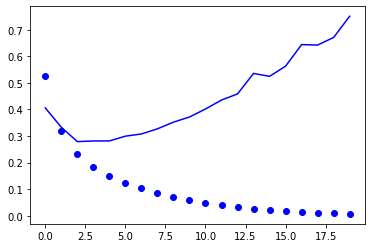

In [ ]:
epchs=range(0,20)
plt.plot(epchs,history2_dict['loss'],'bo')
plt.plot(epchs,history2_dict['val_loss'],'b')
plt.show()

In [ ]:
model2.predict(test_ohh)

array([[5.04787862e-02],
       [1.00000000e+00],
       [8.13961029e-04],
       ...,
       [8.48671913e-01],
       [8.39710236e-04],
       [1.05457395e-01]], dtype=float32)

In [ ]:
test_labels_ohh

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)